## Проект 8. Сбореый_проект_2. Добыча золота.

### Описание проекта и постановка задачи.

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
Вам нужно:
* Подготовить данные;
* Провести исследовательский анализ данных;
* Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.
Следующий урок посвящён технологическому процессу очистки руды.
Решите сами, какие детали нужны для построения модели, а какие — нет.

### Описание данных.

Данные находятся в трёх файлах:
* gold_recovery_train.csv — обучающая выборка;
* gold_recovery_test.csv — тестовая выборка;
* gold_recovery_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date).  
Соседние по времени параметры часто похожи.  
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.  
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

## Загрузка и подготовка данных
1.1. Откройте файлы и изучите их.
Путь к файлам:
* /datasets/gold_recovery_train.csv.
* /datasets/gold_recovery_test.csv.
* /datasets/gold_recovery_full.csv.  

1.2. Проверьте, что эффективность обогащения рассчитана правильно.
Вычислите её на обучающей выборке для признака rougher.output.recovery.
Найдите MAE между вашими расчётами и значением признака. Опишите
выводы.  
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это
за параметры? К какому типу относятся?  
1.4. Проведите предобработку данных.

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats as st
from IPython.display import display
import seaborn as sns
#from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #, accuracy_score, f1_score, confusion_matrix, roc_auc_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression #,LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle

### Загрузка данных

In [2]:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

### Изучение данных

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    display(data_train.sample(3).T)
#display(data_test.sample(3))
#display(data_full.sample(3))

,4733,1409,5563
date,2016-07-30 04:59:59,2016-03-13 17:00:00,2017-01-02 18:59:59
final.output.concentrate_ag,5.12112,5.39498,0
final.output.concentrate_pb,10.1773,8.81488,0
final.output.concentrate_sol,8.54494,4.8087,0
final.output.concentrate_au,43.4886,44.4785,0
final.output.recovery,67.9903,67.2919,0
final.output.tail_ag,8.91157,10.5691,10.1062
final.output.tail_pb,2.33747,1.70114,1.71213
final.output.tail_sol,9.9674,18.322,11.0924
final.output.tail_au,2.74211,2.80198,2.38577


In [30]:
#data_train.info()
#data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              16860 non-null  object 
 1   final_out_con_ag                  16788 non-null  float64
 2   final_out_con_pb                  16788 non-null  float64
 3   final_out_con_sol                 16490 non-null  float64
 4   final_out_con_au                  16789 non-null  float64
 5   final_out_recovery                15339 non-null  float64
 6   final_out_tail_ag                 16794 non-null  float64
 7   final_out_tail_pb                 16677 non-null  float64
 8   final_out_tail_sol                16715 non-null  float64
 9   final_out_tail_au                 16794 non-null  float64
 10  1cl_in_sulfate                    15553 non-null  float64
 11  1cl_in_depressant                 15598 non-null  float64
 12  1cl_

In [6]:
#переименуем названия столбцов
for df in [data_train, data_test, data_full]:
    columns=df.columns
    columns1 = [row.replace('.', '_') for row in columns]
    columns2 = [row.replace('primary_cleaner', '1cl') for row in columns1]
    columns3 = [row.replace('rougher', '0cl') for row in columns2]
    columns4 = [row.replace('secondary_cleaner', '2cl') for row in columns3]
    columns5 = [row.replace('floatbank', 'fb') for row in columns4]
    columns6 = [row.replace('concentrate', 'con') for row in columns5]
    columns7 = [row.replace('input', 'in') for row in columns6]
    columns8 = [row.replace('output', 'out') for row in columns7]
    columns9 = [row.replace('state', 'st') for row in columns8]
    columns10 = [row.replace('calculation', 'calc') for row in columns9]
    df.set_axis(columns10, axis='columns', inplace=True)
#data_train.info()

In [7]:
#признаки "полезной" концентрации металлов на разных этапах
au_con = ['0cl_in_feed_au', '0cl_out_con_au', '1cl_out_con_au', 'final_out_con_au']
ag_con = ['0cl_in_feed_ag', '0cl_out_con_ag', '1cl_out_con_ag', 'final_out_con_ag']
pb_con = ['0cl_in_feed_pb', '0cl_out_con_pb', '1cl_out_con_pb', 'final_out_con_pb']
legend = ['сырьё', 'после флотации', 'после первичной очистки', 'после вторичной очистки']
#признаки концентрации в "хвостах" на разных этапах
au_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
ag_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
pb_tail = ['0cl_out_tail_au', '1cl_out_tail_au', '2cl_out_tail_au', 'final_out_tail_au'] 
legend_tail = ['после флотации', 'после первичной очистки', 'после вторичной очистки', 'финальные хвосты']

### Проверка правильности расчета rougher.output.recovery

In [8]:
#вынесем необходимые данные в отдельный df
data_MAE = data_train.loc[:, ['0cl_out_recovery', '0cl_out_con_au', '0cl_in_feed_au', '0cl_out_tail_au']]

_c1 = data_MAE['0cl_out_con_au']
_f1 = data_MAE['0cl_in_feed_au']
_t1 = data_MAE['0cl_out_tail_au']
data_MAE['0cl_out_recovery_2'] = _c1*(_f1-_t1)/(_f1*(_c1-_t1))*100

data_MAE.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE.dropna(subset=['0cl_out_recovery_2'], inplace=True) 
print()
data_MAE.info()

print('Нет первоначального расчета rougher.output.recovery')
display(data_MAE[data_MAE['0cl_out_recovery']!=data_MAE['0cl_out_recovery']].sample(5).T)

data_MAE.dropna(inplace=True)

display(data_MAE.loc[:, ['0cl_out_recovery', '0cl_out_recovery_2']].sample(5).T)
MAE = mean_absolute_error(data_MAE['0cl_out_recovery'], data_MAE['0cl_out_recovery_2'])
print(MAE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      16778 non-null  float64
 2   0cl_in_feed_au      16777 non-null  float64
 3   0cl_out_tail_au     14611 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0cl_out_recovery    14287 non-null  float64
 1   0cl_out_con_au      14577 non-null  float64
 2   0cl_in_feed_au      14577 non-null  float64
 3   0cl_out_tail_au     14577 non-null  float64
 4   0cl_out_recovery_2  14577 non-null  float64
dtypes: float64(5)
memory usage: 683.3 KB
Нет первонача

,16607,11027,7796,14674,8649
0cl_out_recovery,NaN,NaN,NaN,NaN,NaN
0cl_out_con_au,3.366292,6.826314,0.308807,18.413390,5.328790
0cl_in_feed_au,0.010000,6.925856,8.118752,0.010000,0.000000
0cl_out_tail_au,2.258871,0.712067,1.871901,2.381199,2.692304
0cl_out_recovery_2,-68360.243330,100.167382,-15.201068,-27233.837313,-inf


,12800,2833,3874,9526,8901
0cl_out_recovery,90.787743,70.577509,77.888916,83.618245,86.658399
0cl_out_recovery_2,90.787743,70.577509,77.888916,83.618245,86.658399


9.444891926100695e-15


### Проверка правильности расчета final.output.recovery

In [9]:
#вынесем необходимые данные в отдельный df
data_MAE_2 = data_train.loc[:, ['final_out_recovery', 'final_out_con_au', '0cl_in_feed_au', 'final_out_tail_au']]

_c2 = data_MAE_2['final_out_con_au'] 
_f2 = data_MAE_2['0cl_in_feed_au']
_t2 = data_MAE_2['final_out_tail_au']
data_MAE_2['final_out_recovery_2'] = _c2*(_f2-_t2)/(_f2*(_c2-_t2))*100

data_MAE_2.info()

#удалим строки где нет возможности расчитать rougher.output.recovery
data_MAE_2.dropna(subset=['final_out_recovery_2'], inplace=True) 
print()
data_MAE_2.info()

print('Нет первоначального расчета final_out_recovery')
display(data_MAE_2[data_MAE_2['final_out_recovery']!=data_MAE_2['final_out_recovery']].sample(5).T)

data_MAE_2.dropna(inplace=True)

display(data_MAE_2.loc[:, ['final_out_recovery', 'final_out_recovery_2']].sample(5).T)
MAE_2 = mean_absolute_error(data_MAE_2['final_out_recovery'], data_MAE_2['final_out_recovery_2'])
print(MAE_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   final_out_recovery    15339 non-null  float64
 1   final_out_con_au      16789 non-null  float64
 2   0cl_in_feed_au        16777 non-null  float64
 3   final_out_tail_au     16794 non-null  float64
 4   final_out_recovery_2  15582 non-null  float64
dtypes: float64(5)
memory usage: 658.7 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15582 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   final_out_recovery    15339 non-null  float64
 1   final_out_con_au      15582 non-null  float64
 2   0cl_in_feed_au        15582 non-null  float64
 3   final_out_tail_au     15582 non-null  float64
 4   final_out_recovery_2  15582 non-null  float64
dtypes: float64(5)
memory u

,12590,3087,11612,1266,11593
final_out_recovery,NaN,NaN,NaN,NaN,NaN
final_out_con_au,0.010000,39.530481,39.995902,40.434038,18.975416
0cl_in_feed_au,6.601802,0.000000,0.000000,1.970067,0.000000
final_out_tail_au,0.623722,3.228677,4.000827,3.266619,4.168022
final_out_recovery_2,-1.475461,-inf,-inf,-71.596799,-inf


,2263,503,10289,13106,12405
final_out_recovery,65.124597,20.993384,64.603059,71.248063,72.58032
final_out_recovery_2,65.124597,20.993384,64.603059,71.248063,72.58032


8.158251945945868e-15


In [10]:
#Посмотрим на низкие значения концентрации на разных этапах
display(data_train[data_train['0cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['1cl_out_con_au']<2][au_con].sample(15).T)
display(data_train[data_train['final_out_con_au']<2][au_con].sample(15).T)

,5920,16600,11505,16240,14612,15697,12337,13540,10195,7576,4950,10285,14590,126,11540
0cl_in_feed_au,0.0,0.01,0.0,0.01,0.01,0.451126,6.021780,0.01,5.872096,0.0,0.0,7.212202,0.01,0.0,0.0
0cl_out_con_au,0.0,0.01,0.0,0.01,0.01,0.416259,0.000000,0.01,0.000000,0.0,0.0,0.000000,0.01,0.0,0.0
1cl_out_con_au,0.0,0.01,0.0,0.01,0.01,8.800925,37.465701,0.01,38.007722,0.0,0.0,32.667739,0.01,0.0,0.0
final_out_con_au,0.0,0.01,0.0,0.01,0.01,9.283484,48.200868,0.01,46.927912,0.0,0.0,38.784247,0.01,0.0,0.0


,2010,14297,16652,14605,4096,10440,1996,15607,5875,11524,8785,15645,16134,3049,16235
0cl_in_feed_au,0.0,0.983689,11.299531,0.01,0.0,0.000000,0.0,0.010000,0.0,0.0,0.0,9.337482,7.410750,0.0,0.01
0cl_out_con_au,0.0,15.961671,15.175235,0.01,0.0,0.000000,0.0,0.010000,0.0,0.0,0.0,16.502685,15.715523,0.0,0.01
1cl_out_con_au,0.0,0.010000,0.010000,0.01,0.0,0.238203,0.0,0.010000,0.0,0.0,0.0,0.010000,0.010000,0.0,0.01
final_out_con_au,0.0,48.738412,44.793049,0.01,0.0,0.000000,0.0,15.197804,0.0,0.0,0.0,46.279400,42.417690,0.0,0.01


,5908,2033,4075,2305,11938,8733,5394,13574,11976,15682,14608,1824,5925,3058,5840
0cl_in_feed_au,0.0,0.0,0.0,0.000000,9.730888,0.0,7.909726,7.385092,0.0,5.205454,0.01,0.0,0.0,0.0,0.0
0cl_out_con_au,0.0,0.0,0.0,0.000000,23.831096,0.0,0.000000,22.268216,0.0,0.010000,0.01,0.0,0.0,0.0,0.0
1cl_out_con_au,0.0,0.0,0.0,24.517708,0.000000,0.0,0.000000,0.010000,0.0,16.941718,0.01,0.0,0.0,0.0,0.0
final_out_con_au,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.010000,0.0,0.010000,0.01,0.0,0.0,0.0,0.0


Случаи когда концентрация падает до 0 и затем скачет обратно до ожидаемых значений - явные выбросы.

Расчет rougher.output.recovery и final.output.recovery в исходных данных произведен правильно, но есть строки с отсутствующими значениями которые можно "досчитать" после заполнения ошибок (нули и околонулевые значения) в "столбцах-родителях".

### Анализ признаков, недоступных в тестовой выборке.

In [29]:
data_targ = data_train.copy()

for col in data_train.columns:
    if col in data_test.columns:
        del data_targ[col]
    
data_targ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   final_out_con_ag                  16788 non-null  float64
 1   final_out_con_pb                  16788 non-null  float64
 2   final_out_con_sol                 16490 non-null  float64
 3   final_out_con_au                  16789 non-null  float64
 4   final_out_recovery                15339 non-null  float64
 5   final_out_tail_ag                 16794 non-null  float64
 6   final_out_tail_pb                 16677 non-null  float64
 7   final_out_tail_sol                16715 non-null  float64
 8   final_out_tail_au                 16794 non-null  float64
 9   1cl_out_con_ag                    16778 non-null  float64
 10  1cl_out_con_pb                    16502 non-null  float64
 11  1cl_out_con_sol                   16224 non-null  float64
 12  1cl_

В тестовой выборке отсутствуют признаки, значения которых нельзя установить/получить до начала или в процессе обработки руды.  

### Выводы по данным

Столбец date - перевести в формат DateTime и выделить год, месяц и день  
Есть 0 и околонулевые значения в столбцах со значениями концентраций ("con" в названии) являющиеся ошибкой. 
Часть отсутствующих значений recovery можно рассчитать после заполнения столбцов "родителей".

### Подготовка данных

## Анализ данных
2. Проанализируйте данные
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на
различных этапах очистки. Опишите выводы.
2.2. Сравните распределения размеров гранул сырья на обучающей и
тестовой выборках. Если распределения сильно отличаются друг от друга,
оценка модели будет неправильной.
2.3. Исследуйте суммарную концентрацию всех веществ на разных
стадиях: в сырье, в черновом и финальном концентратах. Заметили
аномальные значения в суммарном распределении или нет? Если они
есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите
аномалии.


### Сравнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

#### Золото

In [11]:
display(data_train.loc[:, au_con].sample(10).T)

,5430,16027,14038,2483,13444,16809,9962,12731,14519,1026
0cl_in_feed_au,8.231898,7.251616,8.095109,11.488345,11.059721,5.417500,6.492072,11.374172,10.685967,9.387732
0cl_out_con_au,23.871340,19.584010,20.370701,23.029237,20.000945,19.163356,21.465054,20.747379,18.963567,19.088845
1cl_out_con_au,38.854173,34.414384,30.439740,30.665502,33.114392,30.064945,38.207687,31.882945,32.622874,32.787428
final_out_con_au,48.286497,46.711513,47.020979,38.765870,45.021477,43.237559,49.163474,46.154890,46.257649,42.718645


In [12]:
display(data_train[au_con].mean())

0cl_in_feed_au       7.170717
0cl_out_con_au      17.401541
1cl_out_con_au      29.164596
final_out_con_au    39.467217
dtype: float64

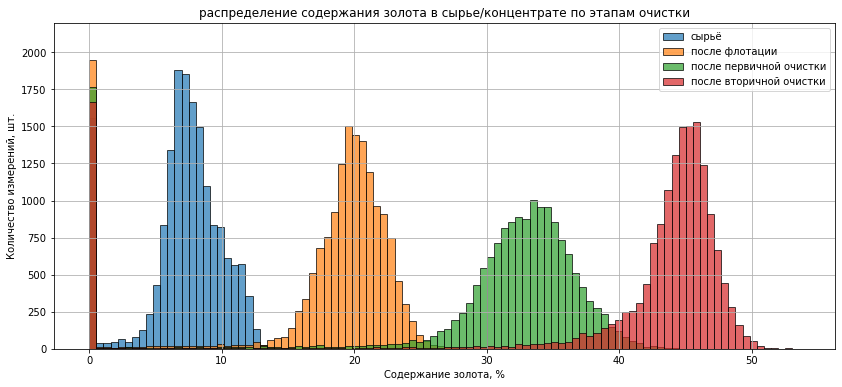

In [13]:
data_train[au_con].plot.hist(bins=100, edgecolor = 'black', ylim=(0, 2200), figsize=(14, 6), grid=True, alpha = 0.7)
plt.title('распределение содержания золота в сырье/концентрате по этапам очистки'); 
plt.ylabel('Количество измерений, шт.')
plt.xlabel('Содержание золота, %')
plt.legend(legend);

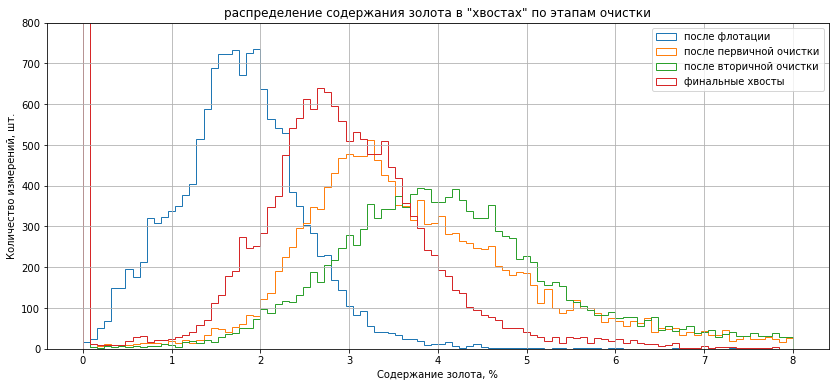

In [14]:
data_train[au_tail].plot(kind='hist', histtype='step', range=(0, 8), bins=100, ylim=(0, 800), figsize=(14, 6), grid=True)
plt.title('распределение содержания золота в "хвостах" по этапам очистки'); 
plt.ylabel('Количество измерений, шт.')
plt.xlabel('Содержание золота, %')
plt.legend(legend_tail);

In [15]:
display(data_train.loc[:, au_tail].sample(10).T)

,11339,170,1351,9689,1367,2640,11533,4047,8088,1683
0cl_out_tail_au,1.725766,2.757144,1.889648,NaN,1.505903,2.393367,NaN,NaN,1.465055,1.913322
1cl_out_tail_au,3.028299,3.032189,5.815369,3.592352,3.661946,5.892664,0.0,0.0,3.015493,4.934312
2cl_out_tail_au,2.907909,0.534699,5.059971,4.799925,3.451814,4.709654,0.0,0.0,3.521521,3.731736
final_out_tail_au,2.913357,3.353719,3.551093,3.327467,2.775349,0.669244,0.0,0.0,2.734362,3.128256


In [16]:
display(data_train[au_tail].mean())

0cl_out_tail_au      1.763930
1cl_out_tail_au      3.590534
2cl_out_tail_au      3.935796
final_out_tail_au    2.687512
dtype: float64

#### Серебро

In [17]:
display(data_train.loc[:, ag_con].sample(5).T)

,2402,16848,14924,2645,9994
0cl_in_feed_ag,13.004150,6.085168,6.713862,7.169926,6.933834
0cl_out_con_ag,14.981496,11.308509,13.565206,10.539816,10.289078
1cl_out_con_ag,11.848950,7.346926,9.355396,7.793737,7.444811
final_out_con_ag,8.980484,3.573966,5.659857,4.935606,4.113796


In [18]:
display(data_train[ag_con].mean())

0cl_in_feed_ag       7.832347
0cl_out_con_ag      10.580475
1cl_out_con_ag       7.422640
final_out_con_ag     4.716907
dtype: float64

#### Свинец

In [19]:
display(data_train.loc[:, pb_con].sample(5).T)

,14867,5008,14875,38,5913
0cl_in_feed_pb,2.542303,3.554117,2.613096,2.837027,0.0
0cl_out_con_pb,6.595456,7.138319,5.765828,7.775682,0.0
1cl_out_con_pb,9.121524,11.527667,9.645139,10.598498,0.0
final_out_con_pb,7.644849,10.274697,8.168509,10.211518,0.0


In [20]:
display(data_train[pb_con].mean())

0cl_in_feed_pb      3.218931
0cl_out_con_pb      6.880322
1cl_out_con_pb      8.620294
final_out_con_pb    9.113559
dtype: float64

Концентрация золота с каждым этапом растет на 10-12%, что на выходе позволяет увеличить его содержание до 40-50%. При этом содержание серебра после флотации немного возрастает, а далее падает, а свинец значительно прибавляет на флотации и немного после 1 и 2 очистки.   
Процентное содержание золота в "хвостах" около 1-5%. Наибольшие потери (относительные) на 2 этапе очистки.

## Обучение и проверка модели
3. Постройте модель
3.1. Напишите функцию для вычисления итоговой sMAPE.
3.2. Обучите разные модели и оцените их качество кросс-валидацией.
Выберите лучшую модель и проверьте её на тестовой выборке. Опишите
выводы.

Вам пригодятся формулы метрик качества: см. пдф или распечатку


### Разделение данных на обучающую и валидационную выборки

In [21]:
123features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    data_0.drop(['product'], axis=1), data_0['product'], test_size=0.25, random_state=123)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    data_1.drop(['product'], axis=1), data_1['product'], test_size=0.25, random_state=123)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    data_2.drop(['product'], axis=1), data_2['product'], test_size=0.25, random_state=123)

SyntaxError: invalid syntax (<ipython-input-21-5255df33d2c7>, line 1)

### Обучение моделей

In [ ]:
123model = LinearRegression()

model.fit(features_train_0, target_train_0)
predictions_valid_0 = model.predict(features_valid_0)
pred_0_mean = predictions_valid_0.mean()
RMSE_0 = mean_squared_error(target_valid_0, predictions_valid_0)**0.5
R2_0 = r2_score(target_valid_0, predictions_valid_0)
print('Регион 0.  Cредний запас предсказанного сырья: %.1f' %pred_0_mean, ' RMSE модели: %.1f' %RMSE_0)
predictions_valid_0=pd.Series(predictions_valid_0, index=target_valid_0.index)

### Выводы по моделям для регионов

## Подготовка к расчёту прибыли

## Функция для расчёта прибыли 

## Расчет прибыли и оценка рисков 

### Регион 0

### Сравнение регинонов

В ходе исследования получены следующие характеристики:  

Характеристика | Регион 0 | Регион 1 | Регион 2
--- |--- | --- | ---
Cредний запас сырья (факт) (тыс. бар) | 92,9 | 69,3 | 94,9
--- |--- | --- | ---
LinearRegression() |--- | --- | ---
Cредний запас предсказанного сырья (тыс. бар)  | 92,5 | 69,3 | 95,1
RMSE (тыс. бар) | 37,6 | 0,9 | 40,1
R2 | 0.2813 | 0.9996 | 0.1931
--- |--- | --- | ---
Прибыль и риски |--- | --- | --- 
Средняя предсказанная прибыль (млн. руб.) |501.7 | 520.4 | 375.7
95 процентный доверительный интервал (млн. руб.) |-17.8  /  998.3 | 106.7  /  952.1 | -173.8  /  912.8
Вероятность убытков (млн. руб.) | 0.027| 0.002 | 0.095

## Выводы